In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML

# Center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Let's start by reading the data.

In [3]:
samples = pd.read_excel('results.xlsx', sheet_name='samples', index_col=0)
samples

,empty_weight,weight_with_solution,weight_5_hours,weight_10_hours,weight_15_hours,notes
id,,,,,,
1,0.732,4.815,1.485,1.454,1.453,NaN
2,0.735,4.758,1.253,1.238,1.238,NaN
3,0.733,4.732,1.097,1.086,1.087,NaN
4,0.725,4.851,0.989,0.985,0.986,NaN
5,0.739,4.699,0.920,0.918,0.920,NaN
6,0.738,4.780,0.869,0.867,0.871,NaN
7,0.730,4.774,0.822,0.821,0.823,NaN
8,0.737,4.682,0.801,0.800,0.802,Replaced original boat after forgetting to wei...
9,0.733,4.812,0.779,0.779,0.782,Replaced original boat after forgetting to wei...


In [4]:
trials = pd.read_excel('results.xlsx', sheet_name='measurements', index_col=0)
trials

,sample_id,difluid_zero,difluid_tds,difluid_t,difluid_n',trad_brix,notes
id,,,,,,,
1,1,NaN,18.85,24.3,1.3666,21.3,NaN
2,1,NaN,18.96,24.1,1.3668,21.2,NaN
3,1,NaN,18.82,24.2,1.3666,21.2,NaN
4,2,NaN,13.03,24.4,1.3562,15.1,NaN
5,2,NaN,13.03,24.3,1.3562,15.2,NaN
6,2,NaN,13.00,24.4,1.3561,15.1,NaN
7,3,0.26,9.42,24.9,1.3497,10.9,"When testing zero on DiFluid, it measured 0.26%"
8,3,NaN,9.36,24.7,1.3496,11.0,NaN
9,3,NaN,9.33,24.7,1.3495,11.0,NaN


We can calculate TDS for the traditional refractometer as follows.

In [5]:
trials['trad_tds'] = trials['trad_brix'] * 0.83
#trials['trad_tds'] = trials['trad_brix'] * 0.85
#trials['trad_tds'] = 0.0036 * trials['trad_brix']**2 + 0.7897 * trials['trad_brix'] - 0.0071
trials

,sample_id,difluid_zero,difluid_tds,difluid_t,difluid_n',trad_brix,notes,trad_tds
id,,,,,,,,
1,1,NaN,18.85,24.3,1.3666,21.3,NaN,17.679
2,1,NaN,18.96,24.1,1.3668,21.2,NaN,17.596
3,1,NaN,18.82,24.2,1.3666,21.2,NaN,17.596
4,2,NaN,13.03,24.4,1.3562,15.1,NaN,12.533
5,2,NaN,13.03,24.3,1.3562,15.2,NaN,12.616
6,2,NaN,13.00,24.4,1.3561,15.1,NaN,12.533
7,3,0.26,9.42,24.9,1.3497,10.9,"When testing zero on DiFluid, it measured 0.26%",9.047
8,3,NaN,9.36,24.7,1.3496,11.0,NaN,9.130
9,3,NaN,9.33,24.7,1.3495,11.0,NaN,9.130


Now let's calculate TDS using oven drying.

In [6]:
samples['solid_weight'] = samples['weight_15_hours'] - samples['empty_weight']
samples['sample_weight'] = samples['weight_with_solution'] - samples['empty_weight']
samples['tds'] = samples['solid_weight'] / samples['sample_weight'] * 100.
samples

,empty_weight,weight_with_solution,weight_5_hours,weight_10_hours,weight_15_hours,notes,solid_weight,sample_weight,tds
id,,,,,,,,,
1,0.732,4.815,1.485,1.454,1.453,NaN,0.721,4.083,17.658584
2,0.735,4.758,1.253,1.238,1.238,NaN,0.503,4.023,12.503107
3,0.733,4.732,1.097,1.086,1.087,NaN,0.354,3.999,8.852213
4,0.725,4.851,0.989,0.985,0.986,NaN,0.261,4.126,6.325739
5,0.739,4.699,0.920,0.918,0.920,NaN,0.181,3.960,4.570707
6,0.738,4.780,0.869,0.867,0.871,NaN,0.133,4.042,3.290450
7,0.730,4.774,0.822,0.821,0.823,NaN,0.093,4.044,2.299703
8,0.737,4.682,0.801,0.800,0.802,Replaced original boat after forgetting to wei...,0.065,3.945,1.647655
9,0.733,4.812,0.779,0.779,0.782,Replaced original boat after forgetting to wei...,0.049,4.079,1.201275


Now we can calculate the residual with respect to the oven dried TDS.

In [7]:
trials = pd.merge(trials, samples['tds'], how='left', left_on='sample_id', right_index=True)
trials

,sample_id,difluid_zero,difluid_tds,difluid_t,difluid_n',trad_brix,notes,trad_tds,tds
id,,,,,,,,,
1,1,NaN,18.85,24.3,1.3666,21.3,NaN,17.679,17.658584
2,1,NaN,18.96,24.1,1.3668,21.2,NaN,17.596,17.658584
3,1,NaN,18.82,24.2,1.3666,21.2,NaN,17.596,17.658584
4,2,NaN,13.03,24.4,1.3562,15.1,NaN,12.533,12.503107
5,2,NaN,13.03,24.3,1.3562,15.2,NaN,12.616,12.503107
6,2,NaN,13.00,24.4,1.3561,15.1,NaN,12.533,12.503107
7,3,0.26,9.42,24.9,1.3497,10.9,"When testing zero on DiFluid, it measured 0.26%",9.047,8.852213
8,3,NaN,9.36,24.7,1.3496,11.0,NaN,9.130,8.852213
9,3,NaN,9.33,24.7,1.3495,11.0,NaN,9.130,8.852213


In [8]:
trials['residual_trad_tds'] = trials['trad_tds'] - trials['tds']
trials['residual_difluid_tds'] = trials['difluid_tds'] - trials['tds']
trials

,sample_id,difluid_zero,difluid_tds,difluid_t,difluid_n',trad_brix,notes,trad_tds,tds,residual_trad_tds,residual_difluid_tds
id,,,,,,,,,,,
1,1,NaN,18.85,24.3,1.3666,21.3,NaN,17.679,17.658584,0.020416,1.191416
2,1,NaN,18.96,24.1,1.3668,21.2,NaN,17.596,17.658584,-0.062584,1.301416
3,1,NaN,18.82,24.2,1.3666,21.2,NaN,17.596,17.658584,-0.062584,1.161416
4,2,NaN,13.03,24.4,1.3562,15.1,NaN,12.533,12.503107,0.029893,0.526893
5,2,NaN,13.03,24.3,1.3562,15.2,NaN,12.616,12.503107,0.112893,0.526893
6,2,NaN,13.00,24.4,1.3561,15.1,NaN,12.533,12.503107,0.029893,0.496893
7,3,0.26,9.42,24.9,1.3497,10.9,"When testing zero on DiFluid, it measured 0.26%",9.047,8.852213,0.194787,0.567787
8,3,NaN,9.36,24.7,1.3496,11.0,NaN,9.130,8.852213,0.277787,0.507787
9,3,NaN,9.33,24.7,1.3495,11.0,NaN,9.130,8.852213,0.277787,0.477787


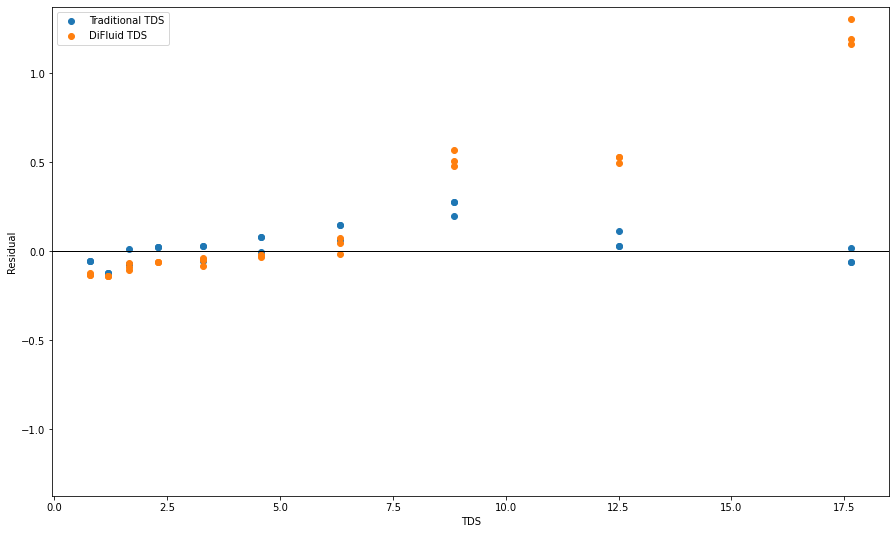

In [9]:
# Create the figure
fig, ax = plt.subplots(figsize=(15,9))
#fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('TDS')
ax.set_ylabel('Residual')

# Plot the residuals
ax.scatter(trials['tds'], trials['residual_trad_tds'], label='Traditional TDS')
ax.scatter(trials['tds'], trials['residual_difluid_tds'], label='DiFluid TDS')

# Make plot symmetrical
yrange = np.max(np.abs(ax.get_ylim()))
ax.set_ylim((-yrange, yrange))

# Draw horizontal line at y = 0
plt.axhline(y=0., color='k', lw=1)

# Add a legend to the plot
ax.legend()

If we assume that some percentage of the original sample is volatile, and is lost in the drying process, then we can adjust the result as follows.

In [11]:
# Percent volatiles
v_ratio = 0.03

# v_ratio = v / (v + s)
# -> v = v_ratio (v + s)
# -> v (1 - v_ratio) = s * v_ratio
# -> v = s * v_ratio / (1 - v_ratio)
# -> v + s = s * v_ratio / (1 - v_ratio) + s
# -> v + s = s (v_ratio / (1 - v_ratio) + 1)
# -> v + s = s * (v_ratio / (1 - v_ratio) + (1 - v_ratio) / (1 - v_ratio))
# -> v + s = s * (v_ratio + (1 - v_ratio)) / (1 - v_ratio)
# -> v + s = s / (1 - v_ratio)

samples['solid_weight_adj'] = (samples['weight_15_hours'] - samples['empty_weight']) / (1 - v_ratio)
samples['tds_adj'] = samples['solid_weight_adj'] / samples['sample_weight'] * 100.

if 'tds_adj' in trials: trials = trials.drop(columns=['tds_adj'])
trials = pd.merge(trials, samples['tds_adj'], how='left', left_on='sample_id', right_index=True)

trials['residual_trad_tds_adj'] = trials['trad_tds'] - trials['tds_adj']
trials['residual_difluid_tds_adj'] = trials['difluid_tds'] - trials['tds_adj']

And the plot now looks like this:

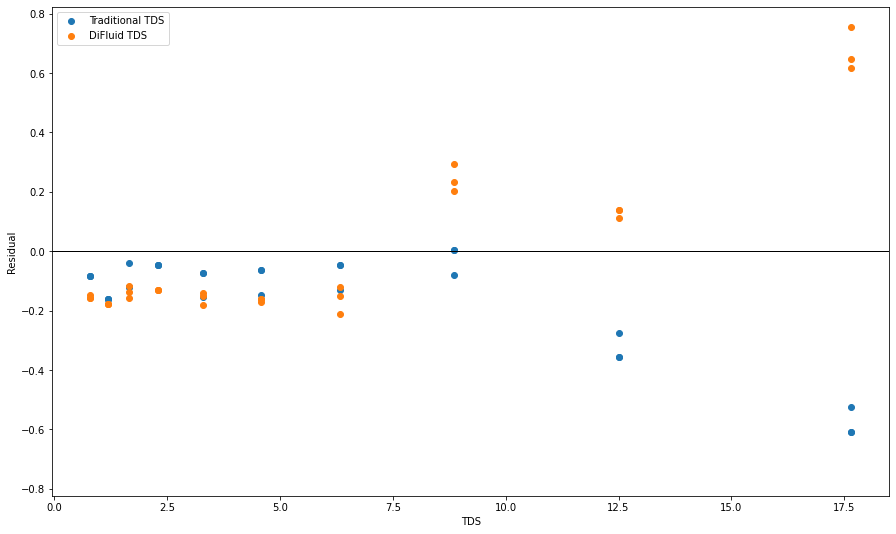

In [12]:
# Create the figure
fig, ax = plt.subplots(figsize=(15,9))
#fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('TDS')
ax.set_ylabel('Residual')

# Plot the residuals
ax.scatter(trials['tds'], trials['residual_trad_tds_adj'], label='Traditional TDS')
ax.scatter(trials['tds'], trials['residual_difluid_tds_adj'], label='DiFluid TDS')

# Make plot symmetrical
yrange = np.max(np.abs(ax.get_ylim()))
ax.set_ylim((-yrange, yrange))

# Draw horizontal line at y = 0
plt.axhline(y=0., color='k', lw=1)

# Add a legend to the plot
ax.legend()

This isn't really better.

What if we try reproducing the plot from our previous post?

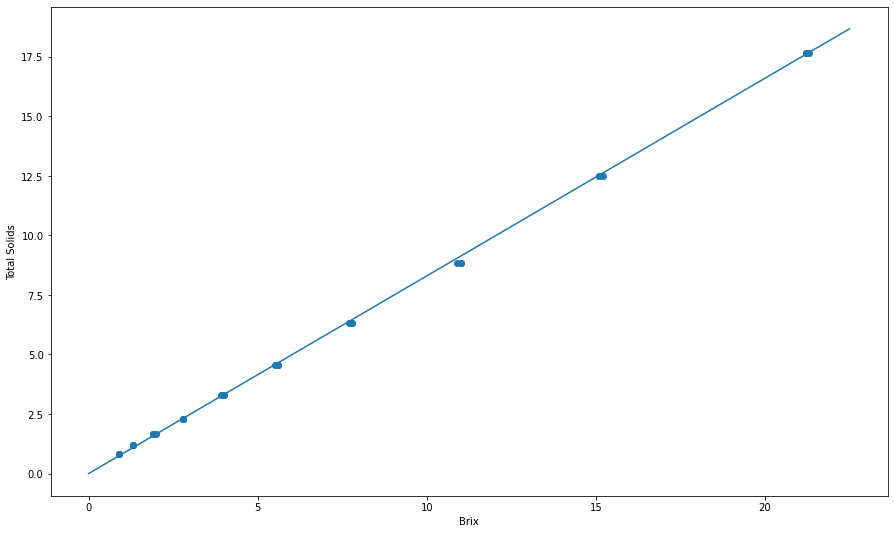

In [14]:
# Create the figure
fig, ax = plt.subplots(figsize=(15,9))
#fig.patch.set_facecolor('white')

# Label the axes
ax.set_xlabel('Brix')
ax.set_ylabel('Total Solids')

# Plot the residuals
ax.scatter(trials['trad_brix'], trials['tds'])

# Plot fit
xs = np.linspace(0, 22.5, 200)
ys = 0.83 * xs
ax.plot(xs, ys)